# 移动平均预测模型

## 一次移动平均方法

In [185]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 一次平均移动Y_t为原始数据，N为选定数据个数
def Single_Move_average(Y_t,N):
    M_t1 = np.zeros((Y_t.shape[0] - N + 1,1))
    for i in range(Y_t.shape[0] - N + 1):
        M_t1[i] = np.mean(Y_t[i:i + N])
    return M_t1

In [3]:
Y_t = np.array([820,950,1140,1380,1510,1740,1920,2130,2410])
M_t1 = Single_Move_average(Y_t,3)
print (M_t1)

[[  970.        ]
 [ 1156.66666667]
 [ 1343.33333333]
 [ 1543.33333333]
 [ 1723.33333333]
 [ 1930.        ]
 [ 2153.33333333]]


## 二次移动平均方法求预测值(其中Y_t为1993-2001年的工商税金/万元)

在一次移动平均的基础上，对M_t1进行一次平均.

二次移动平均法的线性趋势预测模型如下:
$$ \hat{y}_{t+\tau}=\hat{a}_t+\hat{b}_{t}\tau$$
$$\hat{a}_t=2M_t^{(1)}-M_t^{(2)}$$
$$b_t=\frac{2}{N-1}(M_t^{(1)}-M_t^{(2)})$$

In [77]:
def Second_Move_average(Y_t,N,tau):
    # tau 为向后预测的年份数
    M_t1 = Single_Move_average(Y_t,N)
    M_t2 = Single_Move_average(M_t1,N)
    a_t = 2 * M_t1[-1] - M_t2[-1]
    b_t = 2 / (N-1) * (M_t1[-1] - M_t2[-1])
    Y_predict = a_t + b_t * tau
    return Y_predict
    

In [69]:
Y_predict = Second_Move_average(Y_t,3,3)
print (Y_predict)

[ 278.]


# 指数平滑预测模型 

   初始值的确定，即第一期的预测值。一般原数列的项数较多时（大于15项），可以选用第一期的观察值或选用比第一期前一期的观察值作为初始值。如果原数列的项数较少时（小于15项），可以选取最初几期（一般为前三期）的平均数作为初始值。指数平滑方法的选用，一般可根据原数列散点图呈现的趋势来确定。如呈现直线趋势，选用二次指数平滑法；如呈现抛物线趋势，选用三次指数平滑法。或者，当时间序列的数据经二次指数平滑处理后，仍有曲率时，应用三次指数平滑法。

## 一次指数平滑法 

$$S_t^{(1)} = \alpha y_t + (1-\alpha)S_{t-1}^{(1)}$$

In [147]:
def Single_exponential_smoothing(alpha,Y_t):
    # alpha 为加权系数范围(0,1) Y_t 为原始数据
    S_t1 = np.zeros((Y_t.shape[0],1))
    S_t1[0] = np.mean(Y_t[0:2])
    i = 0
    while(i < Y_t.shape[0]-1):
        S_t1[i+1] = alpha * Y_t[i + 1] + (1 - alpha)*S_t1[i]
        i+=1
    return S_t1

In [191]:
# X为年份 Y_t 为某商场营业额的原始数据
X = np.arange(1990,2002).reshape(-1,1)
Y_t = np.array([120,128,130,142,140,154,170,196,210,225,228,245]).reshape(-1,1)
S_t1 = Single_exponential_smoothing(0.4,Y_t)
print ("一次平均平滑法之后的值为:")
print (S_t1)

一次平均平滑法之后的值为:
[[ 124.        ]
 [ 125.6       ]
 [ 127.36      ]
 [ 133.216     ]
 [ 135.9296    ]
 [ 143.15776   ]
 [ 153.894656  ]
 [ 170.7367936 ]
 [ 186.44207616]
 [ 201.8652457 ]
 [ 212.31914742]
 [ 225.39148845]]


## 二次指数平滑法求预测值

二次指数平滑法即在第一次指数平滑法的基础上对$S_t^{(1)}$在进行一次指数平滑.

二次指数平滑法的线性趋势预测模型如下:
$$S_t^{(2)} = \alpha S_t^{(1)} + (1-\alpha)S_{t-1}^{(2)}$$
$$\hat {y}_{t+T} = a_t+b_tT~~~~(T=1,2,......,t)$$
$$a_t=2S_t^{(1)}-S_t^{(2)}$$
$$b_t=\frac{\alpha}{1-\alpha}(S_t^{(1)}-S_t^{(2)})$$

In [195]:
def Second_exponential_smoothing(alpha,Y_t,T):
    # T 为向后预测的年份数 
    S_t1 = Single_exponential_smoothing(alpha,Y_t)
    S_t2 = Single_exponential_smoothing(alpha,S_t1)
    i = 0
    Y_predict = np.zeros((Y_t.shape[0],1))
    while (i < Y_t.shape[0]):
        a_t = 2 * S_t1[-1] - S_t2[-1]
        b_t = alpha / (1 - alpha) * (S_t1[-1] - S_t2[-1])
        Y_predict[i] = a_t +  b_t * ( - Y_t.shape[0] + 1 + i)
        i+=1
    Y_predict_T = a_t +  b_t * T
    return Y_predict,Y_predict_T

In [196]:
Y_predict,Y_predict_T = Second_exponential_smoothing(0.4,Y_t,3) #预测2002年的营业额

预测值Y_predict为:
[[ 104.39516019]
 [ 117.1316158 ]
 [ 129.8680714 ]
 [ 142.60452701]
 [ 155.34098262]
 [ 168.07743822]
 [ 180.81389383]
 [ 193.55034943]
 [ 206.28680504]
 [ 219.02326065]
 [ 231.75971625]
 [ 244.49617186]]
预测值Y_predict_T,2004年的营业额为:
[ 282.70553868]


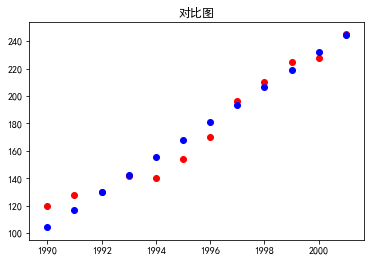

In [197]:
print ("预测值Y_predict为:")
print (Y_predict)
print ("预测值Y_predict_T,2004年的营业额为:")
print (Y_predict_T)

plt.rcParams["font.family"] = "SimHei"
plt.scatter(X,Y_t,color='red')
plt.scatter(X,Y_predict,color='blue')
plt.title("对比图") #蓝色为预测值 红色为实际值
plt.show()